In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

In [24]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [25]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [26]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


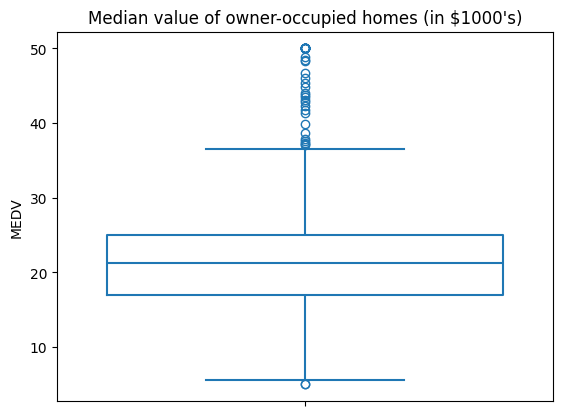

In [27]:
# For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(y='MEDV', data=boston_df, fill=False).set_title("Median value of owner-occupied homes (in $1000's)")


From the boxpot, it is evident that the median value of owner-occupoed homes is around $21000 for this area. And there are several outliers outsider IQR. Most outliers are homes of higher value.

In [28]:
# Provide a bar plot for the Charles river variable

boston_charles_df = boston_df.groupby('CHAS').agg({'AGE':'count'}).reset_index()
boston_charles_df['CHAS_PERC'] = boston_charles_df['AGE'].div(boston_charles_df['AGE'].sum())*100

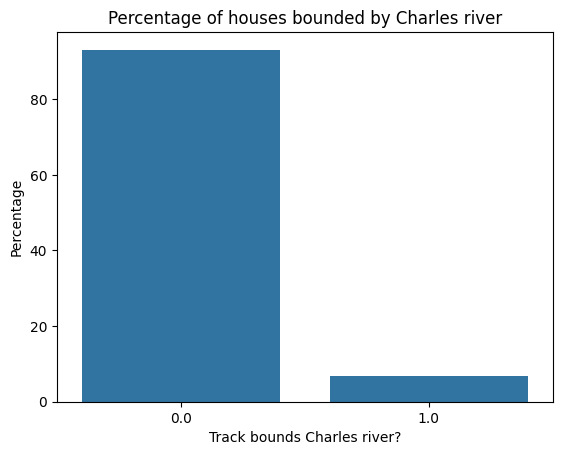

In [29]:
ax = sns.barplot(y="CHAS_PERC", x = 'CHAS',data=boston_charles_df)
ax.set(xlabel='Track bounds Charles river?', ylabel='Percentage', title = 'Percentage of houses bounded by Charles river')
plt.show()

This barplot shows more than 90% of towns are not bounded by the Charles river.

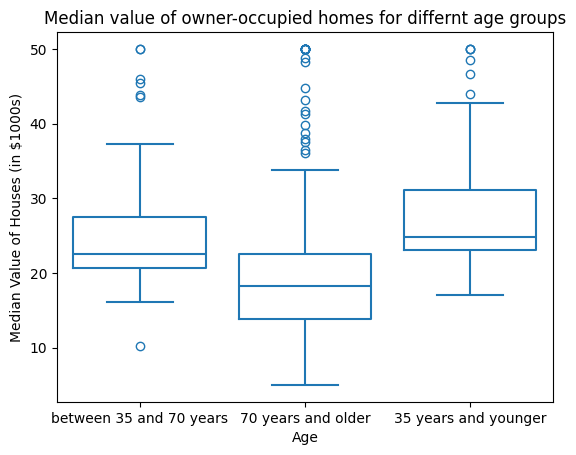

In [30]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GRP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GRP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GRP'] = '70 years and older'

#ax = sns.barplot(y="MEDV", x = 'AGE_GRP',data=boston_df)
#ax.set(ylabel='Median value of homes (in $1000s)', xlabel='Age group')
#plt.show()

ax = sns.boxplot(x='AGE_GRP',y='MEDV', data=boston_df, fill=False)
ax.set(xlabel='Age', ylabel='Median Value of Houses (in $1000s)', title = "Median value of owner-occupied homes for differnt age groups")
plt.show()

This plot shows that the mean value of homes occuppied by people in age-group 35 to 40 is $25k, for people older than 70 years is $20k, for people younger than 35 years is $27k. So, in general people younger than 35 years age could be great customers.

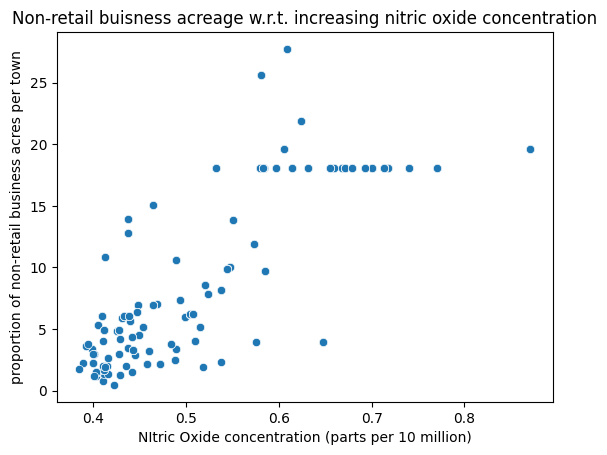

In [31]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations 
# and the proportion of non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set(xlabel='NItric Oxide concentration (parts per 10 million)', ylabel='proportion of non-retail business acres per town', title = 'Non-retail buisness acreage w.r.t. increasing nitric oxide concentration')
plt.show()

Proportion of non-retail business acres per town seems to increase linearly with nitric oxide concetration till 0.6 parts per million, beyond which the proprtion remains approximately constant as 18.


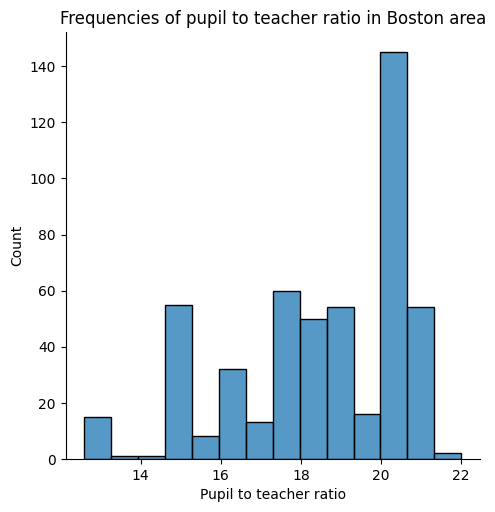

In [32]:
# Create a histogram for the pupil to teacher ratio variable

ax = sns.displot(boston_df['PTRATIO'], kde = False)
ax.set(xlabel='Pupil to teacher ratio', title = 'Frequencies of pupil to teacher ratio in Boston area')
plt.show()

The pupil to teacher ratio does not seems to follow a normal distribution. Most schools have pupil to teacher ratio over 17. 20 is the most common pupil to teacher ratio.

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [33]:
### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: THere is no significant difference in median value of houses bound by the Charles river and not bounded by Charles river (same mean).

H1: median value of houses bound by the Charles river and not bounded by Charles river are significantly different (different mean).

In [34]:
# Levene's test

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [35]:
# t-test

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Conclusion: Since the p value of Levene's test is less than alpha (0.05), so, the standard deviation of the median value of houses for the two groups is different.
Since the p value of t-test is less than alpha (0.05), so, the mean of the median value of houses for the two groups is different.

Hence we reject the null hypothesis and accept the alternate hypothesis that the median value of houses is significantly different for the two groups where they are bounded by Charles river or not.

In [36]:
### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: There is no significant different in the median value of houses for the three groups of owner occupied units built prior to 1940.

H1: There is difference between median value of houses for the three groups

In [37]:
# Test

thirty_five_lower = boston_df[boston_df['AGE_GRP'] == '35 years and younger']['MEDV']
thirty_five_to_seventy = boston_df[boston_df['AGE_GRP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GRP'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirty_five_lower, thirty_five_to_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is much lower than 0.05, so we reject the null hypothesis. So, there is significant difference in median value of houses for the three groups.

In [38]:
### Can we conclude that there is no relationship between Nitric oxide concentrations 
# and proportion of non-retail business acres per town? (Pearson Correlation)

H0: THere is no correlation between nitric oxide concentration and proportion of non-retail business acres per town.

H1: Nitric oxide concentration and non-retail business acres per town are correlated.

In [39]:
# Test

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

**Conclusion** Since p value is less than 0.05, so we reject the null hypothesis. There is a correlation between Nitric oxide concentration and non-retail business acres per town.

In [40]:
# What is the impact of an additional weighted distance to the five Boston employment centres
# on the median value of owner occupied homes? (Regression analysis)

H0: Weighted distance to Boston employemnt center does not have impavt on median value of owner occupied homes.

H1: Weighed distance to employment centers and median value of owner occupied houses are correlated.

In [41]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        18:04:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of constant is 18.339, so for unit increase in weighted distance, the median value of house increase by $18,339.

(Since p value (0.000) is less than alpah (0.05), hence we reject the null hypothesis. SO, there is a correlation between weighted distance to Boston employemnt center and median value of owner occupied homes.)